In [26]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('snowball_data')
import numpy as np
import pandas as pd
import string
import pickle
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#01BEFE", "#ff7f0e", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize'] = 12, 8

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kaustubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kaustubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kaustubh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package snowball_data to
[nltk_data]     C:\Users\Kaustubh\AppData\Roaming\nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!


In [27]:
# Load Data Viz Pkgs
import seaborn as sns

In [28]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [29]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [30]:
# Load Dataset
df = pd.read_csv("New data set .csv")

In [31]:
df.head()

,text,label,happiness,tokens
0,I feel happy.,1,NaN,NaN
1,I'm so happy.,1,NaN,NaN
2,She is happy.,1,NaN,NaN
3,We are happy.,1,NaN,NaN
4,She looks happy.,1,NaN,NaN


In [32]:
# Value Counts
df['label'].value_counts()
#"empty":return 0
#"sadness":return 2
#"enthusiasm":return 1
#"neutral":return 0
#worry":return 2
#"surprise":return 1
#"love":return 3
#"fun":return 1
#"hate":return 4
#"happiness":return 1
#"boredom":return 0
#"relief":return 1
#"anger":return 4

1    1999
2    1500
4    1425
3    1000
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

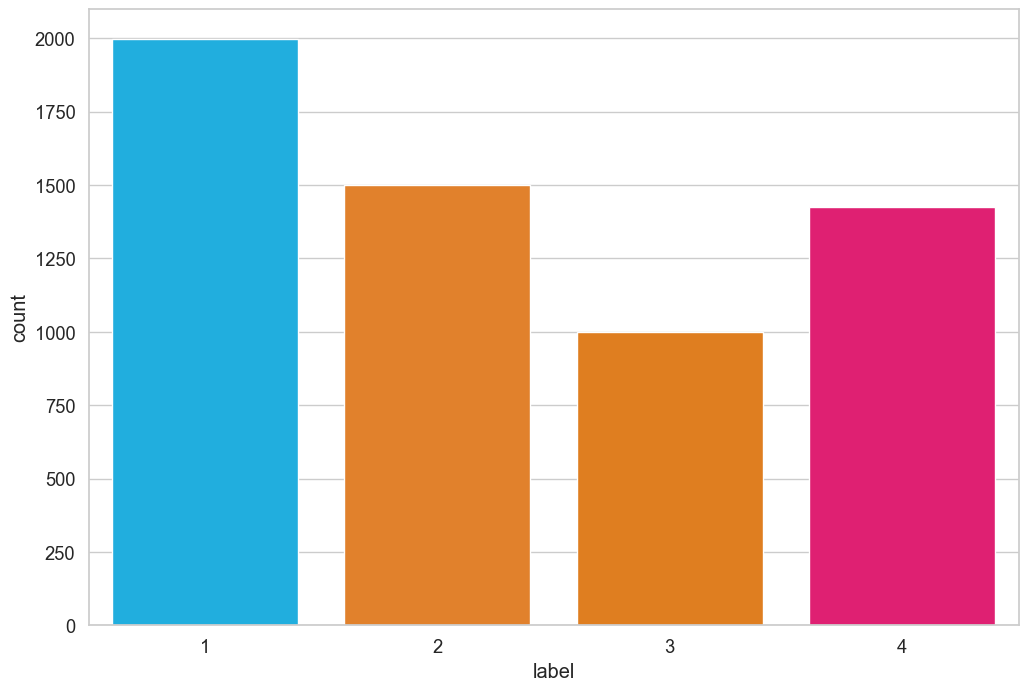

In [33]:
# Plot
sns.countplot(x='label',data=df)

In [34]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [35]:
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs, usernames, and non-alphanumeric characters
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", " ", text)
    
    # Tokenize the text
    tokens = text.split()
    
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stem the words
    stemmer = SnowballStemmer("english")
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join the tokens back into a single string
    text = " ".join(tokens)
    
    return text


In [36]:
df.text = df.text.apply(lambda x: preprocess(x))

In [37]:
# Features & Labels
Xfeatures = df['text']
ylabels = df['label']

In [38]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)


In [39]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [40]:
# LogisticRegression Pipeline
te = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [41]:
# Train and Fit Data
te.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [42]:
te


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [43]:
# Check Accuracy
te.score(x_test,y_test)

0.9589426321709786

In [44]:
# Make A Prediction
ex1 = "i feel really selfish and feel guilty when i think about hurting myself"

In [45]:
te.predict([ex1])

array([2], dtype=int64)

In [46]:
# Prediction Prob
te.predict_proba([ex1])

array([[0.02553382, 0.75805223, 0.08591251, 0.13050143]])

In [47]:
# To Know the classes
te.classes_

array([1, 2, 3, 4], dtype=int64)

In [48]:
prediction = te.predict([ex1])
probs = prediction.max()

In [49]:
with open('te.pkl', 'wb') as handle:
    pickle.dump(te, handle, protocol=pickle.HIGHEST_PROTOCOL)